# Image classification with transfer learning

The following is based on [this tutorial](https://learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/) from LearnOpenCV.

## Set up

In [1]:
# Import modules and models
import numpy as np
import pandas as pd
from tensorflow.keras.applications import (
    vgg16,
    resnet50,
    mobilenet,
    inception_v3)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [2]:
# Initialise models
vgg_model = vgg16.VGG16(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

## Load and preprocess image

Jpg image is taken from the directory 'images'.

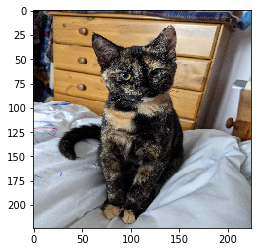

In [3]:
# Assign the image path for the classification experiments
foldername = './images/'
filename = 'cat'
filepath = foldername + filename + '.jpg'

# Load an image in PIL format
original = load_img(filepath, target_size=(224, 224))

# Convert the PIL image to a numpy array
# In PIL image is (width, height, channel)
# In Numpy image is (height, width, channel)
numpy_image = img_to_array(original)

# Convert the image / images into batch format
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0
image_batch = np.expand_dims(numpy_image, axis=0)
plt.imshow(np.uint8(image_batch[0]))

## Use models to predict class

In [4]:
# Preprocess image for each model
preprocessers = [vgg16, 
                 resnet50, 
                 inception_v3, 
                 mobilenet]
preprocessed_inputs = []
for i in range(len(preprocessers)):
    preprocessed_inputs.append(preprocessers[i].preprocess_input(image_batch.copy()))
    
# Get predicted probabilities for classes
models = [vgg_model, 
          resnet_model, 
          inception_model, 
          mobilenet_model]
predictions = []
for i in range(len(models)):
    predictions.append(models[i].predict(preprocessed_inputs[i]))
    
# Convert probabilties to class labels, take default top 5, add to dictionary
labels = ['label_vgg', 
          'label_resnet', 
          'label_inception', 
          'label_mobilenet']
label_dict = {}
for i in range(len(labels)):
    label = decode_predictions(predictions[i])
    label_dict.update({labels[i]: label}) 

In [5]:
# Look at VGG16 predictions
label_dict['label_vgg']

[[('n02123045', 'tabby', 0.46045914),
  ('n02124075', 'Egyptian_cat', 0.26346946),
  ('n02123159', 'tiger_cat', 0.121017106),
  ('n04265275', 'space_heater', 0.020890158),
  ('n04033995', 'quilt', 0.01693488)]]

In [6]:
# Look at ResNet predictions
label_dict['label_resnet']

[[('n04033995', 'quilt', 0.18575484),
  ('n02123045', 'tabby', 0.14281544),
  ('n02124075', 'Egyptian_cat', 0.09912669),
  ('n03938244', 'pillow', 0.0787892),
  ('n03887697', 'paper_towel', 0.06864217)]]

In [7]:
# Look at Inception predictions
label_dict['label_inception']

[[('n02124075', 'Egyptian_cat', 0.6110458),
  ('n02123045', 'tabby', 0.29672545),
  ('n02127052', 'lynx', 0.0468541),
  ('n02123597', 'Siamese_cat', 0.021483697),
  ('n02123159', 'tiger_cat', 0.014768499)]]

In [8]:
# Look at MobileNet predictions
label_dict['label_mobilenet']

[[('n02123045', 'tabby', 0.2807824),
  ('n02123597', 'Siamese_cat', 0.2450607),
  ('n02124075', 'Egyptian_cat', 0.15153317),
  ('n02123159', 'tiger_cat', 0.12267317),
  ('n04033995', 'quilt', 0.049666032)]]

## Save predictions and print picture with chosen model predictions

In [9]:
# Create dictionary of predictions and probabilities
prediction_dict = {}

# Loop through models
for label in labels:
    # Create lists of predictions and probabilities
    predictions = []
    probabilities = []

    for prediction_id in range(len(label_dict[label][0])):
        prediction = label_dict[label][0][prediction_id][1].replace("_", " ")
        probability = round(label_dict[label][0][prediction_id][2]*100,1)
        predictions.append(prediction)
        probabilities.append(probability)
        
    # Save as dataframe
    preds_probs = pd.DataFrame(
        {'Prediction': predictions,
         'Confidence (%)': probabilities
        })
    
    # Add to dictionary
    prediction_dict.update({label: preds_probs}) 

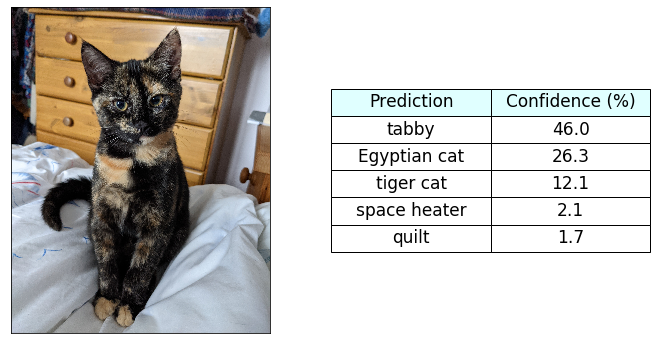

In [10]:
# Assign chosen predictions 
# from label_vgg, label_resnet, label_inception or label_mobilenet
chosen_label = 'label_vgg'

# Load original picture with original dimensions
display_image = load_img(filepath)

# Arrange subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Show image
ax1.imshow(display_image)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# Show table of predictions
table = ax2.table(cellText=prediction_dict[chosen_label].values,
                  colLabels=prediction_dict[chosen_label].columns,
                  cellLoc='center',
                  colColours=['lightcyan','lightcyan'],
                  bbox=[0,0.25,1,0.5])
# Modify table
table.set_fontsize(18)
table.scale(1,3)
ax2.axis('off')

# Show subplots
plt.subplots_adjust(wspace=0.1)

# Save figure
plt.savefig(foldername + filename + '_predictions.jpg')

## Print picture with all predictions

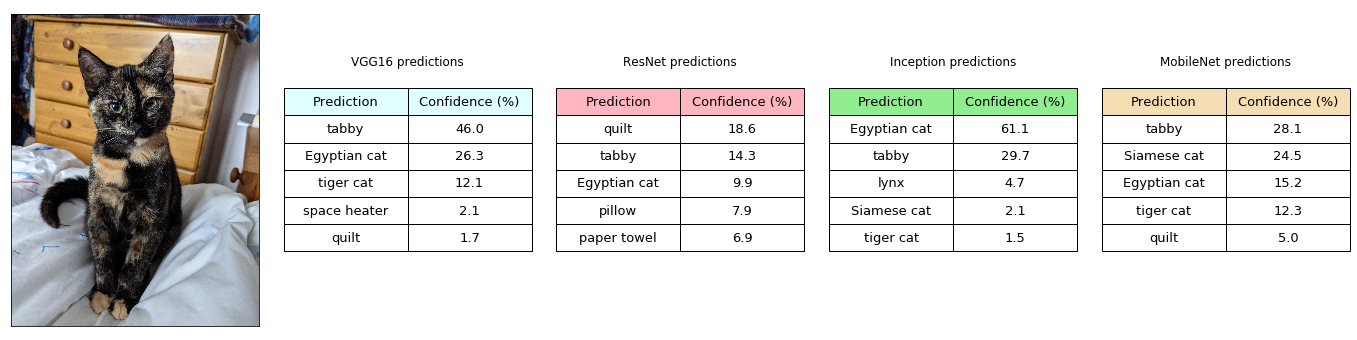

In [11]:
# Load original picture with original dimensions
display_image = load_img(filepath)

# Set colours for tables
table_cols = ['lightcyan', 
              'lightpink', 
              'lightgreen', 
              'wheat']

# Set subtitles
subtitles = ['VGG16 predictions', 
             'ResNet predictions', 
             'Inception predictions', 
             'MobileNet predictions']

# Arrange subplots
fig, axes = plt.subplots(1, 5, figsize=(24,6))

# Show image
axes[0].imshow(display_image)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

# Loop through axes/models/tables
for i in range(len(axes[1:])):
    table = axes[i+1].table(cellText=prediction_dict[labels[i]].values,
                            colLabels=prediction_dict[labels[i]].columns,
                            cellLoc='center',
                            colColours=[table_cols[i],table_cols[i]],
                            bbox=[0,0.25,1,0.5])
    axes[i+1].set_title(subtitles[i], x=.5, y=.8)
    # Modify table
    table.set_fontsize(18)
    table.scale(1,3)
    axes[i+1].axis('off')

# Show subplots
plt.subplots_adjust(wspace=0.1)

# Save figure
plt.savefig(foldername + filename + '_all_predictions.jpg')